In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn.cross_validation as cv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
%matplotlib inline 

data = pd.read_csv("winequality-red.csv", sep=";")
X= data.drop(columns = "quality")
y = data["quality"]

In [8]:
def rmse(actual_y, predicted_y):
    return np.sqrt(1/len(actual_y)*sum((actual_y - predicted_y)**2))

Text(0, 0.5, 'coefficients')

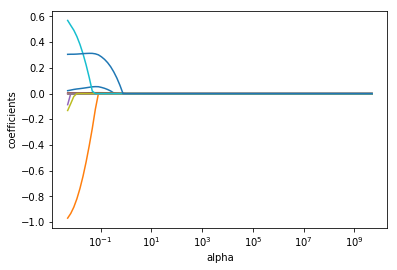

In [19]:
alphas = 10**np.linspace(10,-2,100)*0.5
elasticnet = ElasticNet(fit_intercept= True)
coefs = []
for a in alphas:
    elasticnet.set_params(alpha = a)
    elasticnet.fit(X,y)
    coefs.append(elasticnet.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")



In [7]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
ElasticCV = ElasticNetCV(alphas = alphas, fit_intercept = True, normalize = True)
ElasticCV.fit(X_train, y_train)
ElasticCV.alpha_

0.005

In [10]:
elastic_n = ElasticNet(alpha = ElasticCV.alpha_, normalize = True, fit_intercept = True)
elastic_n.fit(X_train, y_train)
rmse(y_test, elastic_n.predict(X_test))

0.7138602615195963

In [13]:
coefficients_array = np.append(elastic_n.coef_, elastic_n.intercept_)
indices = np.append(X.columns,"intercept")
coefficients = pd.DataFrame(coefficients_array,index = indices).rename(columns = {0: "coefficients"})
coefficients 

,coefficients
fixed acidity,0.002548
volatile acidity,-0.428324
citric acid,0.127720
residual sugar,0.000000
chlorides,-0.212383
free sulfur dioxide,-0.000000
total sulfur dioxide,-0.000661
density,-5.835228
pH,-0.000000
sulphates,0.227382
